In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('housing.csv')

In [ ]:
df

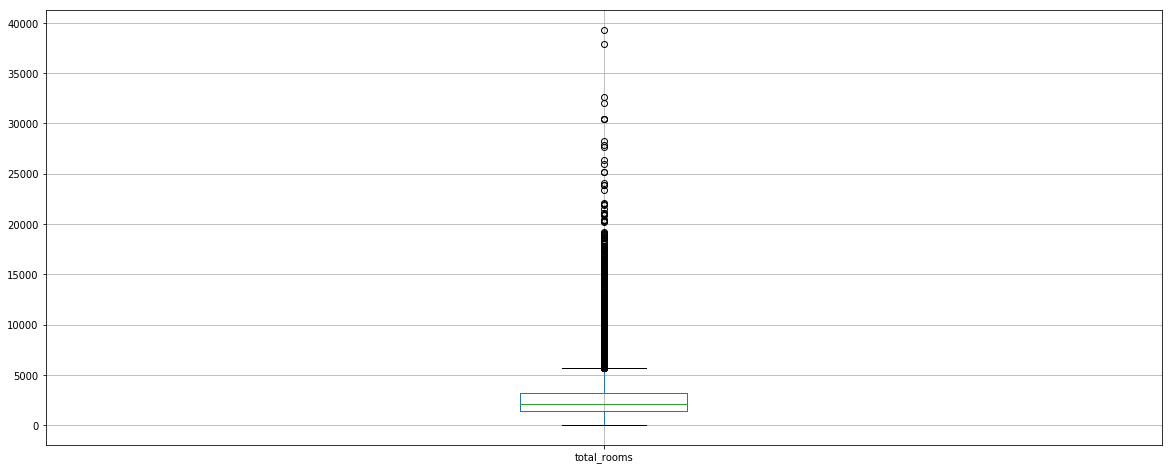

In [2]:
plt.subplots(figsize=[20,8])
df.boxplot('total_rooms')

In [3]:
def filtrar_outlier_tukey(x,valueq1=1.5,valueq3=1.5):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    print("[q1=%f, q3=%f, iqr=%f]" % (q1, q3, iqr))
    
    floor = q1 - valueq1*iqr
    ceiling = q3 + valueq3*iqr
    print("[floor=%f, ceiling=%f]" % (floor, ceiling))
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    print("Numero total de outliers: ",len(outlier_values))
    #print (outlier_values)
    return outlier_indices, outlier_values

In [4]:
outlier_indices, outlier_values = filtrar_outlier_tukey(df.total_rooms)

[q1=1447.750000, q3=3148.000000, iqr=1700.250000]
[floor=-1102.625000, ceiling=5698.375000]
Numero total de outliers:  1287


In [5]:
for index in outlier_indices:
    df.total_rooms.at[index] = np.nan

In [6]:
_, _ = filtrar_outlier_tukey(df.drop(outlier_indices, axis=0).total_rooms)

[q1=1406.000000, q3=2892.000000, iqr=1486.000000]
[floor=-823.000000, ceiling=5121.000000]
Numero total de outliers:  377


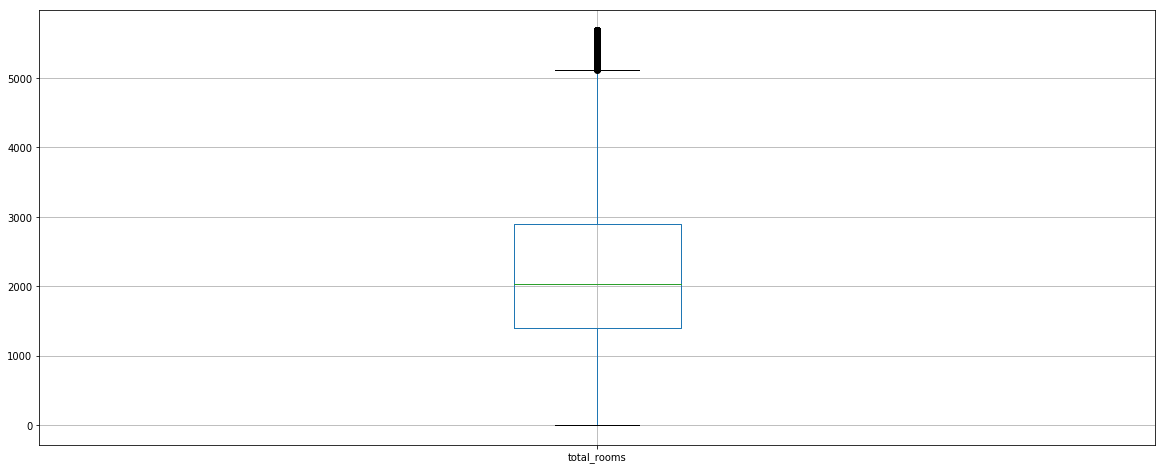

In [7]:
plt.subplots(figsize=[20,8])
df.boxplot('total_rooms',return_type='axes')